In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
covid = pd.read_csv("//GBMLVFILFS05N02/home0$/McDonaS/Data Academy/Covid Data/covid19.csv")
gdp = pd.read_csv("//GBMLVFILFS05N02/home0$/McDonaS/Data Academy/Covid Data/gdp.csv")
tourism = pd.read_csv("//GBMLVFILFS05N02/home0$/McDonaS/Data Academy/Covid Data/tourism.csv")
pop_65 = pd.read_csv("//GBMLVFILFS05N02/home0$/McDonaS/Data Academy/Covid Data/pop65.csv")
pop_desn = pd.read_csv("//GBMLVFILFS05N02/home0$/McDonaS/Data Academy/Covid Data/pop_desn.csv")
beds = pd.read_csv("//GBMLVFILFS05N02/home0$/McDonaS/Data Academy/Covid Data/beds_per_1000.csv")

In [3]:
covid['country_code'] = covid['countryterritoryCode']
covid['country_name'] = covid['countriesAndTerritories']
covid2 = covid.drop(["countryterritoryCode","countriesAndTerritories","geoId"],axis = 1)
covid2.head()

,dateRep,day,month,year,cases,deaths,popData2018,country_code,country_name
0,18/04/2020,18,4,2020,51,1,37172386.0,AFG,Afghanistan
1,17/04/2020,17,4,2020,10,4,37172386.0,AFG,Afghanistan
2,16/04/2020,16,4,2020,70,2,37172386.0,AFG,Afghanistan
3,15/04/2020,15,4,2020,49,2,37172386.0,AFG,Afghanistan
4,14/04/2020,14,4,2020,58,3,37172386.0,AFG,Afghanistan


In [4]:
#Merging all the data together (left joins on country code and name for most as come from same source)
merged_data = covid2.merge(tourism, on='country_code', how='left')
merged_data.rename(columns={'country_name_y': 'country_name'}, inplace = True)
merged_data = merged_data.merge(gdp, on=['country_code','country_name'], how='left')
merged_data = merged_data.merge(pop_65, on=['country_code','country_name'], how = 'left')
merged_data = merged_data.merge(pop_desn, on=['country_code','country_name'], how = 'left' )
merged_data = merged_data.merge(beds, on=['country_code','country_name'], how = 'left')

In [5]:
merged_data.head()

,dateRep,day,month,year,cases,deaths,popData2018,country_code,country_name_x,country_name,tourism_16_18,gdp_18_16,over_65_pop_18,pop_desn_16_18,beds_per_1000_11_15
0,18/04/2020,18,4,2020,51,1,37172386.0,AFG,Afghanistan,Afghanistan,NaN,520.896603,960879.0,56.93776,0.5
1,17/04/2020,17,4,2020,10,4,37172386.0,AFG,Afghanistan,Afghanistan,NaN,520.896603,960879.0,56.93776,0.5
2,16/04/2020,16,4,2020,70,2,37172386.0,AFG,Afghanistan,Afghanistan,NaN,520.896603,960879.0,56.93776,0.5
3,15/04/2020,15,4,2020,49,2,37172386.0,AFG,Afghanistan,Afghanistan,NaN,520.896603,960879.0,56.93776,0.5
4,14/04/2020,14,4,2020,58,3,37172386.0,AFG,Afghanistan,Afghanistan,NaN,520.896603,960879.0,56.93776,0.5


In [6]:
def plot_cases(df, country_code):
    data = df[df['country_code'] == country_code]
    data['dateRep'] = pd.to_datetime(data['dateRep'], dayfirst = True)
    date = data['dateRep']
    cases = data['cases']
    deaths = data['deaths']
    plt.plot(date, cases, '.', color = 'green')
    plt.plot(date, deaths, '.', color = 'red')
    plt.title("Number of Covid19 Cases and Deaths in " + country_code)
    plt.xticks(rotation=90)
    plt.legend(['Cases', 'Deaths'])

C:\ProgramData\App-V\95FD7873-726E-40E9-B477-CC4010411846\9727BF3A-F7F8-45A4-AD38-2F35B6E0FB2A\Root\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


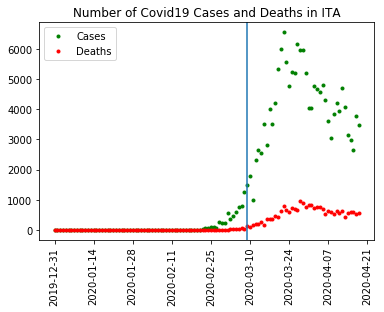

In [7]:
plot_cases(merged_data, 'ITA')
plt.axvline('2020-03-09')

C:\ProgramData\App-V\95FD7873-726E-40E9-B477-CC4010411846\9727BF3A-F7F8-45A4-AD38-2F35B6E0FB2A\Root\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


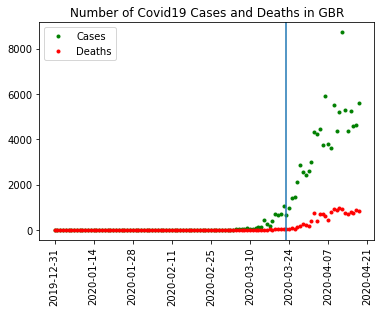

In [8]:
plot_cases(merged_data, 'GBR')
plt.axvline('2020-03-23')

C:\ProgramData\App-V\95FD7873-726E-40E9-B477-CC4010411846\9727BF3A-F7F8-45A4-AD38-2F35B6E0FB2A\Root\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


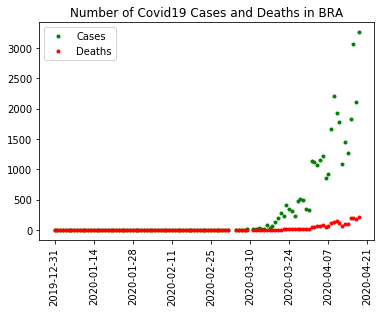

In [9]:
plot_cases(merged_data, 'BRA')

In [10]:
agg_data = pd.DataFrame(merged_data.groupby(['country_code'],sort=True)['country_code','country_name','tourism_16_18','gdp_18_16','over_65_pop_18','pop_desn_16_18','beds_per_1000_11_15'].max())
agg_data.head()

,country_code,country_name,tourism_16_18,gdp_18_16,over_65_pop_18,pop_desn_16_18,beds_per_1000_11_15
country_code,,,,,,,
ABW,ABW,Aruba,1082000.0,25630.266490,14343.0,588.027778,NaN
AFG,AFG,Afghanistan,NaN,520.896603,960879.0,56.937760,0.5
AGO,AGO,Angola,218000.0,3432.385736,682859.0,24.713052,NaN
ALB,ALB,Albania,5340000.0,5268.848504,393976.0,104.612263,2.9
AND,AND,Andorra,3042000.0,42029.762740,NaN,163.842553,NaN


In [13]:
sum_cases = pd.DataFrame(merged_data.groupby(['country_code'])['cases'].sum())
sum_deaths = pd.DataFrame(merged_data.groupby(['country_code'])['deaths'].sum())

In [14]:
#This does the join on the index which here is country code
agg_data2 = agg_data.merge(sum_cases, left_index = True, right_index = True, how='left')
agg_data2 = agg_data2.merge(sum_deaths, left_index = True, right_index = True, how='left')

In [15]:
#Rename the column names to be sum of cases and deaths
agg_data2.rename(columns={'cases': 'sum_cases','deaths': 'sum_deaths'},inplace = True)

In [18]:
agg_data2.shape

(202, 9)

In [16]:
agg_data2.describe()

,tourism_16_18,gdp_18_16,over_65_pop_18,pop_desn_16_18,beds_per_1000_11_15,sum_cases,sum_deaths
count,1.780000e+02,187.000000,1.790000e+02,194.000000,142.000000,202.000000,202.000000
mean,7.651614e+06,18379.080990,3.718501e+06,333.482021,3.192254,10875.638614,757.836634
std,1.456192e+07,26798.699965,1.391202e+07,1514.541442,2.543357,54876.960190,3753.961137
min,1.400000e+04,271.752044,6.174000e+03,0.136497,0.300000,1.000000,0.000000
25%,4.510000e+05,2351.212688,1.441730e+05,37.370577,1.300000,52.750000,1.000000
50%,1.955000e+06,7246.731656,5.823960e+05,91.177915,2.650000,428.500000,7.500000
75%,8.084250e+06,23373.435025,2.080798e+06,218.004208,4.275000,2762.250000,74.250000
max,8.932200e+07,185741.280000,1.520984e+08,19196.000000,13.800000,702164.000000,37054.000000


In [185]:
agg_data2.head()

,country_code,country_name,tourism_16_18,gdp_18_16,over_65_pop_18,pop_desn_16_18,beds_per_1000_11_15,sum_cases,sum_deaths
country_code,,,,,,,,,
ABW,ABW,Aruba,1082000.0,25630.266490,14343.0,588.027778,NaN,96,2
AFG,AFG,Afghanistan,NaN,520.896603,960879.0,56.937760,0.5,845,30
AGO,AGO,Angola,218000.0,3432.385736,682859.0,24.713052,NaN,19,2
ALB,ALB,Albania,5340000.0,5268.848504,393976.0,104.612263,2.9,539,26
AND,AND,Andorra,3042000.0,42029.762740,NaN,163.842553,NaN,696,35


In [186]:
agg_data2.corr()

,tourism_16_18,gdp_18_16,over_65_pop_18,pop_desn_16_18,beds_per_1000_11_15,sum_cases,sum_deaths
tourism_16_18,1.000000,0.172501,0.515987,-0.031035,0.212634,0.670642,0.766002
gdp_18_16,0.172501,1.000000,0.046728,0.478793,0.413970,0.176777,0.178550
over_65_pop_18,0.515987,0.046728,1.000000,-0.003348,0.104485,0.384090,0.329200
pop_desn_16_18,-0.031035,0.478793,-0.003348,1.000000,0.317377,-0.025614,-0.025963
beds_per_1000_11_15,0.212634,0.413970,0.104485,0.317377,1.000000,0.052502,0.050636
sum_cases,0.670642,0.176777,0.384090,-0.025614,0.052502,1.000000,0.907816
sum_deaths,0.766002,0.178550,0.329200,-0.025963,0.050636,0.907816,1.000000


In [189]:
Var_Corr = agg_data2.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

AttributeError: module 'seaborn' has no attribute 'heatmap'

In [188]:
import seaborn as sns

# Questions
1. How to get sns working properly
2. Plot tourism against cases
3. Decide on which questions we are asking and answering
4. try and make a graph of all countries on 1 graph
5. Can we fit a model to Italy
6. Can we use this to predict cases in the UK?

In [22]:
agg_data2['tourism_16_18'].fillna(0)
agg_data2['sum_cases']

country_code
ABW        96
AFG       845
AGO        19
ALB       539
AND       696
ARE      5825
ARG      2658
ARM      1248
ATG        23
AUS      6533
AUT     14603
AZE      1340
BDI         6
BEL     36138
BEN        37
BFA       557
BGD      1838
BGR       846
BHR      1744
BHS        55
BIH      1210
BLR      4779
BLZ        18
BMU        83
BOL       493
BRA     33682
BRB        75
BRN       136
BTN         5
BWA        15
        ...  
SWZ        19
SXM        57
SYC        11
SYR        38
TCA        11
TCD        33
TGO        83
THA      2700
TLS        18
TTO       114
TUN       864
TUR     78546
TWN       395
TZA       147
UGA        55
UKR      5106
URY       570
USA    702164
UZB      1450
VAT         8
VCT        12
VEN       227
VGB         3
VIR        51
VNM       276
XKX       480
YEM         1
ZAF      2783
ZMB        52
ZWE        24
Name: sum_cases, Length: 202, dtype: int64

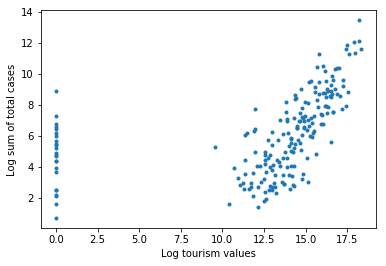

In [33]:
x = agg_data2['tourism_16_18'].fillna(0)
y = agg_data2['sum_cases']
plt.plot(np.log(x +1),np.log(y+1),'.')
plt.xlabel("Log tourism values")
plt.ylabel("Log sum of total cases");
#plt.boxplot(y)

In [35]:
agg_data3 = agg_data2.dropna(subset=['tourism_16_18'])

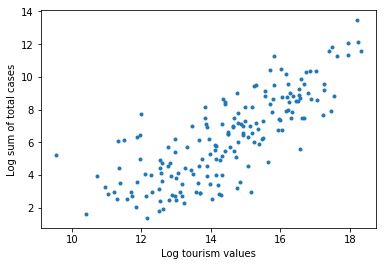

In [39]:
x = agg_data3['tourism_16_18']
y = agg_data3['sum_cases']
plt.plot(np.log(x +1),np.log(y+1),'.')
plt.xlabel("Log tourism values")
plt.ylabel("Log sum of total cases");
#plt.boxplot(y)

Removing null values, and logging both variables we see a strong positive corralation between tourism numbers and the total cases a coutnry has. This tourism number is ....
This is expected as the most visitors a country has the most likely they will be to aide the spread of the virus

In [37]:
import seaborn as sns
sns.__version__

'0.8.0'